In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('dark')

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Applicant_ID,Age,Gender,Marital_Status,Dependents,Monthly_Income,Employment_Status,Employment_Duration,Total_Monthly_Debt_Obligations,Credit_Score,...,Down_Payment_Amount,Interest_Rate,Installment_Amount,Housing_Status,Education_Level,Previous_Loan_Status,Previous_Loan_Amount,Previous_Loan_Term,Previous_Loan_Purpose,Loan_Eligibility
0,1,35,Male,Married,2,6000,Employed,5,1500,700,...,4000,0.08,420,Own,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
1,2,28,Female,Single,0,4000,Employed,3,800,650,...,2000,0.07,260,Rent,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
2,3,45,Male,Married,3,8000,Self-Employed,8,2000,720,...,6000,0.09,550,Own,Master's,Previous Loan Closed,25000,60,Car Purchase,Not Eligible
3,4,33,Female,Married,1,5500,Employed,6,1200,680,...,3000,0.08,380,Own,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
4,5,40,Male,Divorced,0,7000,Employed,10,1500,720,...,4000,0.08,420,Own,High School,Not Applicable,0,0,Not Applicable,Eligible


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Applicant_ID                    120 non-null    int64  
 1   Age                             120 non-null    int64  
 2   Gender                          120 non-null    object 
 3   Marital_Status                  120 non-null    object 
 4   Dependents                      120 non-null    int64  
 5   Monthly_Income                  120 non-null    int64  
 6   Employment_Status               120 non-null    object 
 7   Employment_Duration             120 non-null    int64  
 8   Total_Monthly_Debt_Obligations  120 non-null    int64  
 9   Credit_Score                    120 non-null    int64  
 10  Credit_History_Length           120 non-null    int64  
 11  Debt_to_Income_Ratio            120 non-null    float64
 12  Loan_Amount                     120 

In [4]:
data.drop('Applicant_ID', axis='columns', inplace=True)

In [5]:
data.head()

,Age,Gender,Marital_Status,Dependents,Monthly_Income,Employment_Status,Employment_Duration,Total_Monthly_Debt_Obligations,Credit_Score,Credit_History_Length,...,Down_Payment_Amount,Interest_Rate,Installment_Amount,Housing_Status,Education_Level,Previous_Loan_Status,Previous_Loan_Amount,Previous_Loan_Term,Previous_Loan_Purpose,Loan_Eligibility
0,35,Male,Married,2,6000,Employed,5,1500,700,3,...,4000,0.08,420,Own,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
1,28,Female,Single,0,4000,Employed,3,800,650,2,...,2000,0.07,260,Rent,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
2,45,Male,Married,3,8000,Self-Employed,8,2000,720,5,...,6000,0.09,550,Own,Master's,Previous Loan Closed,25000,60,Car Purchase,Not Eligible
3,33,Female,Married,1,5500,Employed,6,1200,680,4,...,3000,0.08,380,Own,Bachelor's,Not Applicable,0,0,Not Applicable,Eligible
4,40,Male,Divorced,0,7000,Employed,10,1500,720,7,...,4000,0.08,420,Own,High School,Not Applicable,0,0,Not Applicable,Eligible


In [6]:
eligibility_counts = data['Loan_Eligibility'].value_counts()

print("Eligible Frequency:", eligibility_counts['Eligible'])
print("Not Eligible Frequency:", eligibility_counts['Not Eligible'])

Eligible Frequency: 105
Not Eligible Frequency: 15


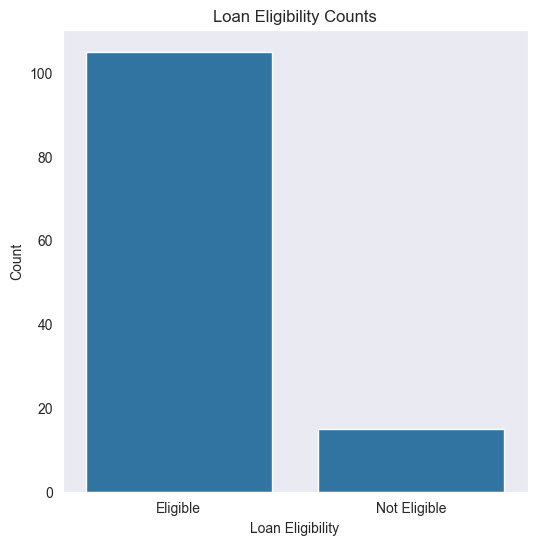

In [7]:

# Get counts of 'Eligible' and 'Not Eligible' loans
eligible_count = eligibility_counts['Eligible']
not_eligible_count = eligibility_counts['Not Eligible']

# Create a bar plot for Loan Eligibility counts
plt.figure(figsize=(6, 6))
sns.barplot(x=['Eligible', 'Not Eligible'], y=[eligible_count, not_eligible_count])
plt.title('Loan Eligibility Counts')
plt.xlabel('Loan Eligibility')
plt.ylabel('Count')
plt.show()

In [8]:
feature_col = ['Loan_Eligibility','Gender','Employment_Status','Housing_Status','Previous_Loan_Status','Marital_Status','Education_Level', 'Previous_Loan_Purpose']
le = LabelEncoder()
for col in feature_col:
    data[col] = le.fit_transform(data[col])


In [9]:
data.head()

,Age,Gender,Marital_Status,Dependents,Monthly_Income,Employment_Status,Employment_Duration,Total_Monthly_Debt_Obligations,Credit_Score,Credit_History_Length,...,Down_Payment_Amount,Interest_Rate,Installment_Amount,Housing_Status,Education_Level,Previous_Loan_Status,Previous_Loan_Amount,Previous_Loan_Term,Previous_Loan_Purpose,Loan_Eligibility
0,35,1,1,2,6000,0,5,1500,700,3,...,4000,0.08,420,0,1,0,0,0,2,0
1,28,0,2,0,4000,0,3,800,650,2,...,2000,0.07,260,1,1,0,0,0,2,0
2,45,1,1,3,8000,1,8,2000,720,5,...,6000,0.09,550,0,4,1,25000,60,0,1
3,33,0,1,1,5500,0,6,1200,680,4,...,3000,0.08,380,0,1,0,0,0,2,0
4,40,1,0,0,7000,0,10,1500,720,7,...,4000,0.08,420,0,3,0,0,0,2,0


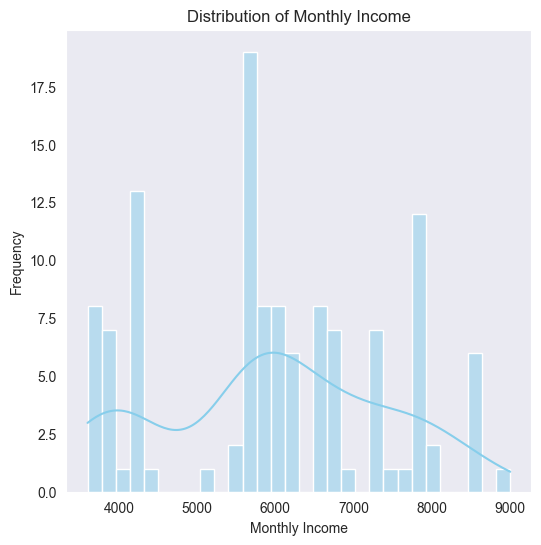

In [10]:
plt.figure(figsize=(6, 6))
sns.histplot(data['Monthly_Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

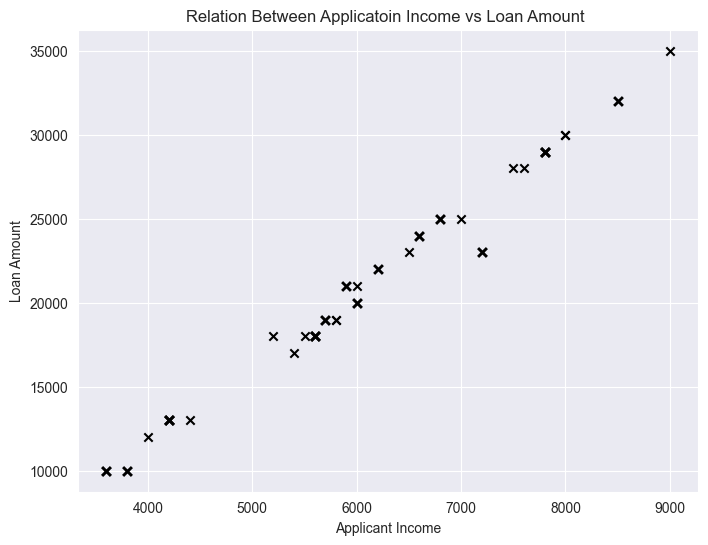

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(data['Monthly_Income'] , data['Loan_Amount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [12]:
# split dataset
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Gender','Marital_Status','Dependents','Monthly_Income','Employment_Status','Employment_Duration','Total_Monthly_Debt_Obligations','Credit_Score','Credit_History_Length','Debt_to_Income_Ratio','Loan_Amount','Loan_Term','Down_Payment_Amount','Interest_Rate','Installment_Amount','Housing_Status','Education_Level','Previous_Loan_Status','Previous_Loan_Amount','Previous_Loan_Term','Previous_Loan_Purpose']],data.Loan_Eligibility,test_size=0.1)

In [13]:
len(X_train)

108

In [14]:
#feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [17]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

c:\Users\dilda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


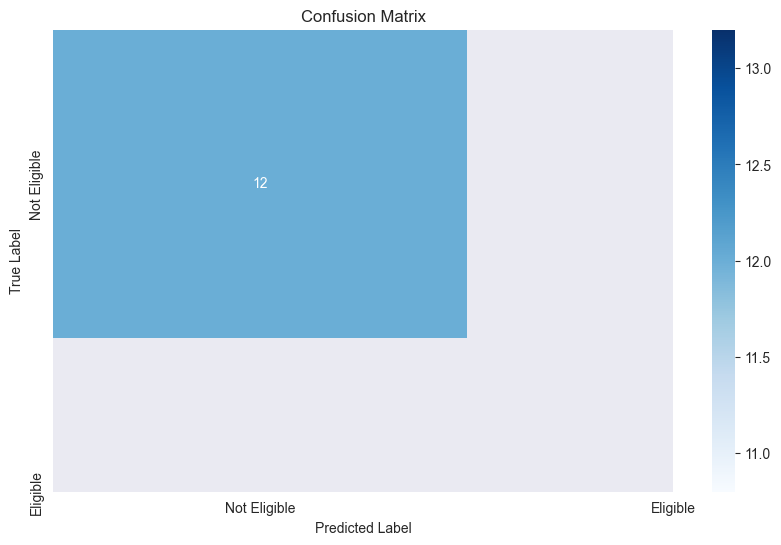

In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible', 'Eligible'], 
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()